In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# gro parser

In [2]:
from utils01 import GROParser

In [3]:
gro = "input/solv_ions_prot.gro"
CUTOFF_RADIUS = 1.0

groparser = GROParser(gro, CUTOFF_RADIUS)
MAINCHAIN = groparser.mainchains
N_ATOMS = groparser.n_atoms
EACH_N_ATOMS = groparser.each_n_atoms
SLICE_INDECES = groparser.slice_indeces
ARRANGED_INDECES = groparser.arranged_indeces
ADJACENT_INDECES = groparser.adjacent_indeces
AB_INDECES = groparser.ab_indeces
ATOM_ALIGN = groparser.atom_align

In [4]:
len(ADJACENT_INDECES)

1235

# read trj

In [5]:
filepath = "input/xvg/2fs/MainChain-coord.xvg"
trj = pd.read_csv(filepath, comment='@', delimiter='\t',
                            header=None, skiprows=14).values[:, 1:]
trj = trj.reshape(trj.shape[0], -1, 3)[:, ARRANGED_INDECES, :]
trj.shape

(101, 1235, 3)

# ３点から角度を求める関数

## １時点ver

In [6]:
coord_center = np.array([0,0,0])
coord2 = np.array([np.sqrt(3)/2,1/2,0])
coord3 = np.array([1/2,np.sqrt(3)/2,0])

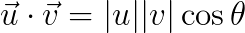

In [7]:
def cal_degree(coord_center, coord2, coord3):
    u = np.subtract(coord2, coord_center)
    v = np.subtract(coord3, coord_center)

    cos_theta = np.inner(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    deg = np.rad2deg(np.arccos(np.clip(cos_theta, -1.0, 1.0)))
    return deg

In [8]:
cal_degree(coord_center, coord2, coord3)

29.99999999999998

## 複数時点ver

In [9]:
coords_center = np.array([
    [0,0,0], [1,1,1]
])

coords2 = np.array([
    [np.sqrt(3)/2,1/2,0], [np.sqrt(3)/2+1,1/2+1,1]
])

coords3 = np.array([
    [1/2,np.sqrt(3)/2,0], [1/2+1,-np.sqrt(3)/2+1,1]
])

30と90になるはず

In [10]:
def cal_degrees(coords_center, coords2, coords3):
    us = np.subtract(coords2, coords_center)
    vs = np.subtract(coords3, coords_center)
    
    inns = np.inner(us, vs)[0]
    norms = np.sqrt(np.sum(np.square(us), axis=1)) * np.sqrt(np.sum(np.square(vs), axis=1))

    cos_thetas = inns / norms
    degs = np.rad2deg(np.arccos(np.clip(cos_thetas, -1.0, 1.0)))
    return degs

In [11]:
cal_degrees(coords_center, coords2, coords3)

array([30., 90.])

# １つの構造、１つの原子種について計算してみる

In [12]:
species = 'CA'
t = 0

In [13]:
struct = trj[t]

In [14]:
l, u = SLICE_INDECES[species]
ADJACENT_INDECES[l:u]

[[[0],
  [618, 927, 1, 310, 619, 928, 2, 311, 620, 929, 3, 312],
  [26, 27, 28, 25, 241, 240, 24, 237, 51, 20, 29],
  [335, 334, 336, 549, 337, 546, 333, 550, 329, 360],
  [644, 643, 645, 642, 858, 646, 855, 641, 857, 854],
  [953, 952, 951, 954, 1167, 1164, 955, 950, 976, 1163]],
 [[1, 927, 618, 309, 0],
  [619, 928, 2, 311, 620, 929, 3, 312, 621, 930, 4, 313],
  [28,
   27,
   51,
   26,
   241,
   52,
   29,
   240,
   237,
   50,
   25,
   244,
   238,
   242,
   236,
   30,
   239,
   243,
   53],
  [336,
   360,
   337,
   335,
   550,
   549,
   546,
   334,
   359,
   361,
   338,
   553,
   358,
   544,
   547,
   545],
  [644,
   645,
   646,
   858,
   669,
   643,
   668,
   855,
   667,
   859,
   670,
   854,
   857,
   647,
   856,
   853,
   642],
  [953,
   955,
   976,
   1167,
   1164,
   954,
   952,
   978,
   977,
   979,
   1168,
   1163,
   1165,
   951,
   1166]],
 [[2, 928, 619, 310, 1, 927, 618, 309, 0],
  [620, 929, 3, 312, 621, 930, 4, 313, 622, 931, 5, 314

In [15]:
degree_list = []
for i in range(l, u):
    coord_center = struct[i]
    coord2 = struct[ADJACENT_INDECES[i][0][0]]
    coord3 = struct[ADJACENT_INDECES[i][1][0]]

    degree_list.append(cal_degree(coord_center, coord2, coord3))

In [16]:
degree_list

[110.31695429398422,
 109.63328331143272,
 109.10508246700593,
 108.20138199726124,
 105.46181318035369,
 110.81873310080587,
 107.91975262234408,
 117.40003419052658,
 115.68784569398528,
 115.75986903770793,
 108.04300700171554,
 118.94451831189161,
 112.02501903598892,
 112.25673900078921,
 116.55642407894794,
 108.95060767093648,
 116.62116206854702,
 108.14689004738813,
 117.34423275827609,
 115.5955125457214,
 115.22210403649021,
 115.80964213621199,
 119.1534378761133,
 114.43771787934638,
 111.13781033667085,
 105.742818991065,
 113.09411975053777,
 105.27085981251243,
 106.12460189440263,
 111.23484043514898,
 107.26815603505285,
 112.33236737069925,
 108.43727686403165,
 111.07725639425102,
 107.92473864814875,
 107.61675460946817,
 115.82124703539799,
 114.95200616128342,
 109.75029230001591,
 110.04658070137272,
 117.86132348105677,
 107.39747762510311,
 118.58825726370499,
 115.07636750485977,
 114.84297344439342,
 105.953331047626,
 108.78173240754698,
 115.12337989201151

# １つの原子種、全時間について

## 角度リスト計算

In [17]:
approved_species_sets = {
    'CA': [set(['N', 'C'])],
    'N': [set(['CA', 'C'])],
    'C': [set(['CA', 'N']), set(['CA', 'O']), set(['N', 'O'])]
}

def cal_degree_list(center_species, species_set):
    if species_set not in approved_species_sets[center_species]:
        print('unapproved species sets')
    
    

    l, u = SLICE_INDECES[center_species]

    degree_list = []
    for i in range(l, u):
        coords_center = trj[:, i, :]
        
        try:
            if center_species == 'C' and species_set == set(['CA', 'N']):
                coords2 = trj[:, ADJACENT_INDECES[i][0][0], :]
                coords3 = trj[:, ADJACENT_INDECES[i][1][1], :]
            elif center_species == 'C' and species_set == set(['O', 'N']):
                coords2 = trj[:, ADJACENT_INDECES[i][1][0], :]
                coords3 = trj[:, ADJACENT_INDECES[i][1][1], :]
            else:
                coords2 = trj[:, ADJACENT_INDECES[i][0][0], :]
                coords3 = trj[:, ADJACENT_INDECES[i][1][0], :]
        except IndexError:
            continue

        degree_list.extend(cal_degrees(coords_center, coords2, coords3).flatten().tolist())
        
    return degree_list

In [18]:
degree_list = cal_degree_list('CA', set(['N', 'C']))

In [19]:
len(degree_list)

31209

In [20]:
# ランダムに100個みる
np.array(degree_list)[np.random.randint(0, len(degree_list), 100).tolist()]

array([108.08872455, 113.37499082, 116.34007821, 109.65370799,
       114.5866167 , 109.17967522, 114.01391652, 112.28819994,
       114.54126711, 109.07094324, 109.31252103, 110.38331065,
       115.96545008, 105.16466576, 109.54651207, 102.17527693,
       116.26746896, 111.05717587, 114.43248084, 101.02200366,
       115.91445025,  99.02633722, 116.97750188, 108.37583075,
       113.16062699, 108.30338332, 112.34465671, 104.22543811,
       117.1266289 ,  99.33295096, 102.98947981, 110.38399873,
       117.25191052, 113.19059282, 117.7211767 , 116.89062305,
       106.97442177, 113.17370243, 114.37953032, 111.52758825,
       118.99209406, 109.18039716, 108.15018662, 113.44928977,
       113.36475052, 106.35252159, 111.75614131, 114.29458857,
       118.61451828, 111.93064874, 111.9230767 , 109.39045815,
       110.4480636 , 108.53606085, 106.8989715 , 117.07546503,
       117.33570831, 110.78312407, 121.20451192,  94.49096387,
       113.65124397, 112.7090692 , 108.28470804, 111.99

## ヒストグラム

In [21]:
hist, bins = np.histogram(degree_list, bins=20)

<BarContainer object of 20 artists>

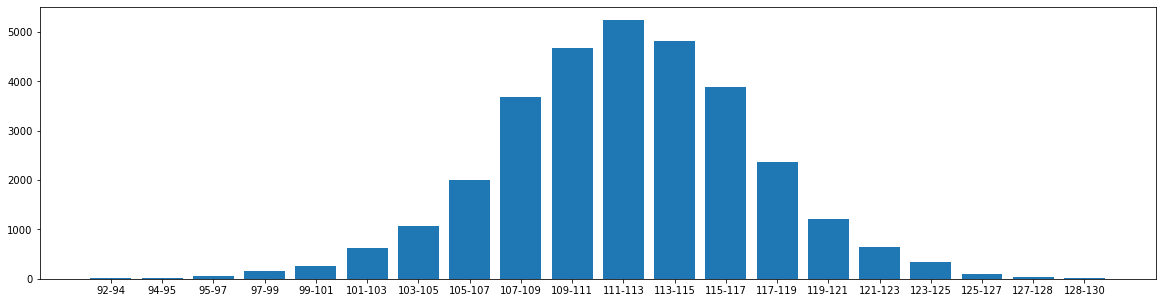

In [22]:
plt.figure(figsize=(20, 5))
plt.bar([f"{int(round(bins[i]))}-{int(round(bins[i+1]))}" for i in range(len(hist))], hist)

# 本番：全原子種、全時間についてみてみる

In [23]:
n_figs = sum([len(li) for li in approved_species_sets.values()])
n_figs

5

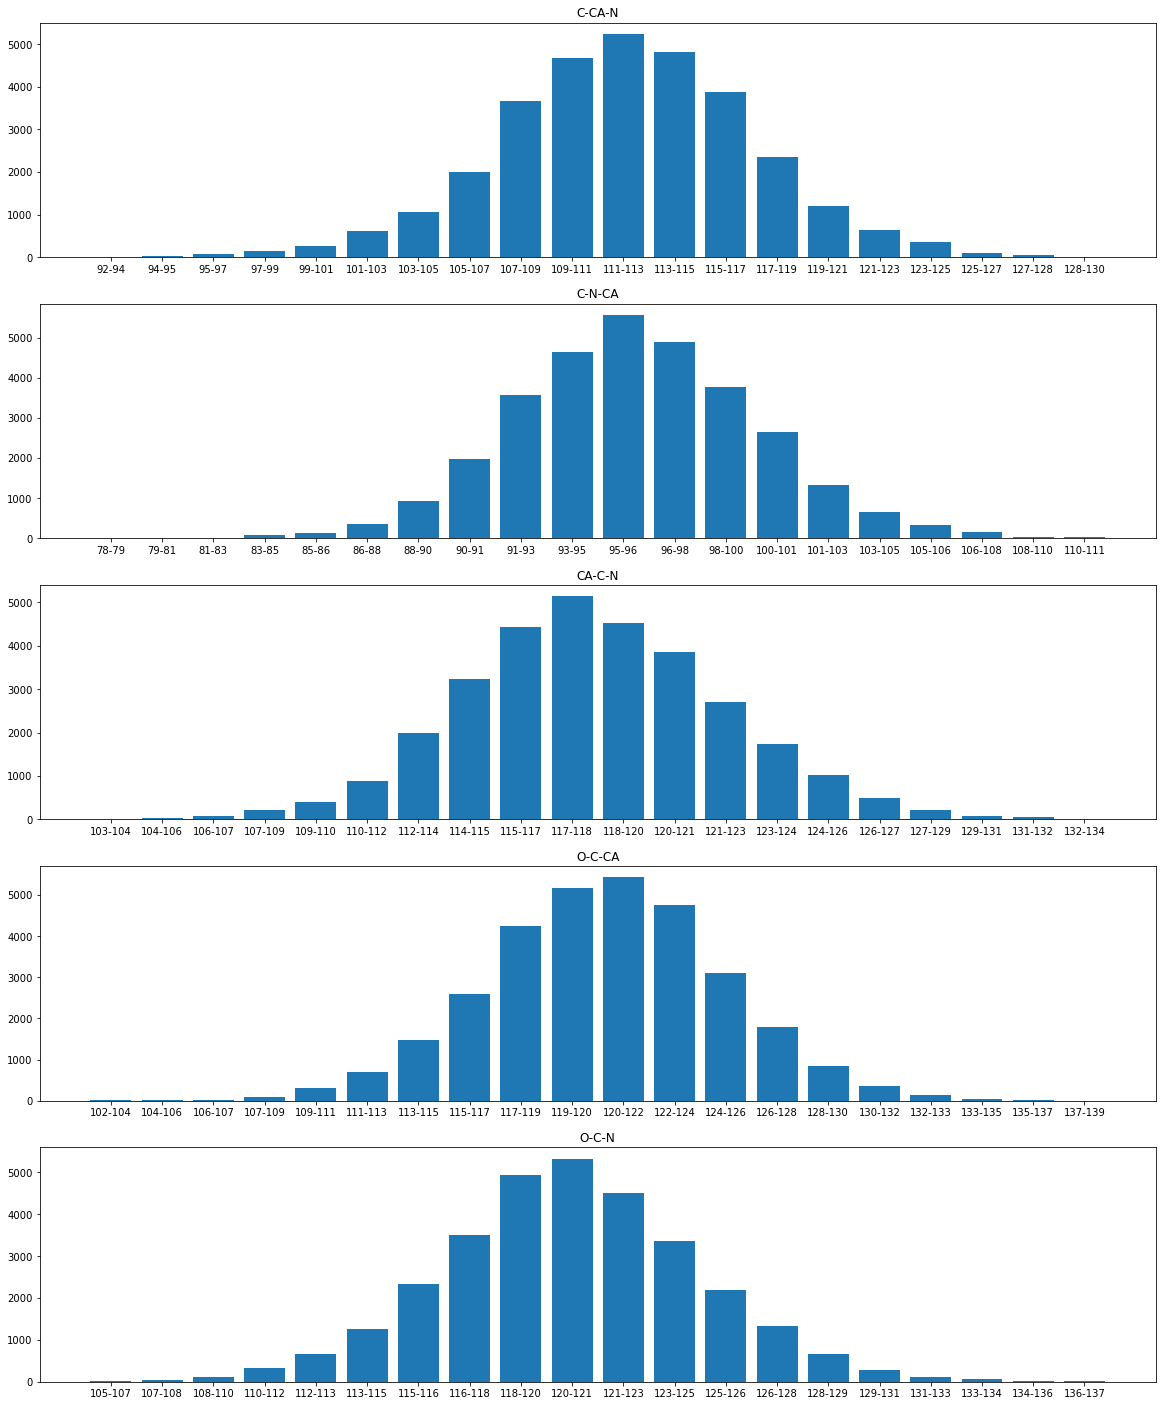

In [24]:
n_bins = 20

fig = plt.figure(figsize=(20,5*n_figs))

i = 0
for species, spset_list in approved_species_sets.items():
    for spset in spset_list:
        i += 1
        fig.add_subplot(n_figs, 1, i)

        degree_list = cal_degree_list(species, spset)
        hist, bins = np.histogram(degree_list, bins=n_bins)

        plt.bar([f"{int(round(bins[i]))}-{int(round(bins[i+1]))}" for i in range(len(hist))], hist)

        sp1, sp2 = spset
        plt.title(f"{sp1}-{species}-{sp2}")